In [19]:
# load data
import pandas as pd
import datetime

from requests import request
request=request(url='https://raw.githubusercontent.com/ToBeHH/hamburg_corona_zahlen/main/data.json', method='get')
data = request.json()

KEY_AGE = 'Verteilung der Infizierten nach Alter und Geschlecht'

timestamp,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12 = [],[],[],[],[],[],[],[],[],[],[],[],[]
used_times = []
i = 0
for key in data.keys():
    # get calendar week from key 
    y = int(key[0:4])
    d = datetime.date(y, int(key[4:6]), int(key[6:8]))
    w = d.isocalendar()[1]
    used_times_key = "%d-%d" % (y,w)
    if KEY_AGE in data[key] and 'bis 5 Jahre' in data[key][KEY_AGE] and not used_times_key in used_times:
        timestamp.append(used_times_key)
        if i == 0:
            r1.append(data[key][KEY_AGE]['bis 5 Jahre']['männlich']+data[key][KEY_AGE]['bis 5 Jahre']['weiblich'])
            r2.append(data[key][KEY_AGE]['6 bis 14 Jahre']['männlich']+data[key][KEY_AGE]['6 bis 14 Jahre']['weiblich'])
            r3.append(data[key][KEY_AGE]['15 bis 19 Jahre']['männlich']+data[key][KEY_AGE]['15 bis 19 Jahre']['weiblich'])
            r4.append(data[key][KEY_AGE]['20 bis 29 Jahre']['männlich']+data[key][KEY_AGE]['20 bis 29 Jahre']['weiblich'])
            r5.append(data[key][KEY_AGE]['30 bis 39 Jahre']['männlich']+data[key][KEY_AGE]['30 bis 39 Jahre']['weiblich'])
            r6.append(data[key][KEY_AGE]['40 bis 49 Jahre']['männlich']+data[key][KEY_AGE]['40 bis 49 Jahre']['weiblich'])
            r7.append(data[key][KEY_AGE]['50 bis 59 Jahre']['männlich']+data[key][KEY_AGE]['50 bis 59 Jahre']['weiblich'])
            r8.append(data[key][KEY_AGE]['60 bis 69 Jahre']['männlich']+data[key][KEY_AGE]['60 bis 69 Jahre']['weiblich'])
            r9.append(data[key][KEY_AGE]['70 bis 79 Jahre']['männlich']+data[key][KEY_AGE]['70 bis 79 Jahre']['weiblich'])
            r10.append(data[key][KEY_AGE]['80 bis 89 Jahre']['männlich']+data[key][KEY_AGE]['80 bis 89 Jahre']['weiblich'])
            r11.append(data[key][KEY_AGE]['über 90 Jahre']['männlich']+data[key][KEY_AGE]['über 90 Jahre']['weiblich'])
            r12.append(data[key][KEY_AGE]['unbekannt'])
        else:
            # only store deltas
            r1.append(data[key][KEY_AGE]['bis 5 Jahre']['männlich']+data[key][KEY_AGE]['bis 5 Jahre']['weiblich']-sum(r1))
            r2.append(data[key][KEY_AGE]['6 bis 14 Jahre']['männlich']+data[key][KEY_AGE]['6 bis 14 Jahre']['weiblich']-sum(r2))
            r3.append(data[key][KEY_AGE]['15 bis 19 Jahre']['männlich']+data[key][KEY_AGE]['15 bis 19 Jahre']['weiblich']-sum(r3))
            r4.append(data[key][KEY_AGE]['20 bis 29 Jahre']['männlich']+data[key][KEY_AGE]['20 bis 29 Jahre']['weiblich']-sum(r4))
            r5.append(data[key][KEY_AGE]['30 bis 39 Jahre']['männlich']+data[key][KEY_AGE]['30 bis 39 Jahre']['weiblich']-sum(r5))
            r6.append(data[key][KEY_AGE]['40 bis 49 Jahre']['männlich']+data[key][KEY_AGE]['40 bis 49 Jahre']['weiblich']-sum(r6))
            r7.append(data[key][KEY_AGE]['50 bis 59 Jahre']['männlich']+data[key][KEY_AGE]['50 bis 59 Jahre']['weiblich']-sum(r7))
            r8.append(data[key][KEY_AGE]['60 bis 69 Jahre']['männlich']+data[key][KEY_AGE]['60 bis 69 Jahre']['weiblich']-sum(r8))
            r9.append(data[key][KEY_AGE]['70 bis 79 Jahre']['männlich']+data[key][KEY_AGE]['70 bis 79 Jahre']['weiblich']-sum(r9))
            r10.append(data[key][KEY_AGE]['80 bis 89 Jahre']['männlich']+data[key][KEY_AGE]['80 bis 89 Jahre']['weiblich']-sum(r10))
            r11.append(data[key][KEY_AGE]['über 90 Jahre']['männlich']+data[key][KEY_AGE]['über 90 Jahre']['weiblich']-sum(r11))
            r12.append(data[key][KEY_AGE]['unbekannt']-sum(r12))
        i = i + 1
        used_times.append(used_times_key)
df = pd.DataFrame([timestamp,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12]).T
df.columns = ['Zeit','bis 5 Jahre','6 bis 14 Jahre','15 bis 19 Jahre','20 bis 29 Jahre','30 bis 39 Jahre','40 bis 49 Jahre','50 bis 59 Jahre','60 bis 69 Jahre','70 bis 79 Jahre','80 bis 89 Jahre','über 90 Jahre','unbekannt']
df = df.set_index('Zeit')
df = df.astype('int32')
df = df.T
df

Zeit,2020-42,2020-43,2020-44,2020-45,2020-46,2020-47,2020-48,2020-49,2020-50,2020-51,...,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,2021-19,2021-20,2021-21
bis 5 Jahre,142,0,17,32,49,93,66,58,46,60,...,87,307,218,0,238,0,88,90,95,78
6 bis 14 Jahre,432,0,55,102,145,233,233,213,141,155,...,113,442,287,0,567,0,229,190,165,203
15 bis 19 Jahre,494,0,62,118,156,262,259,174,116,137,...,103,313,182,0,397,0,162,130,111,113
20 bis 29 Jahre,1937,0,262,472,592,628,535,405,326,376,...,314,896,480,0,995,0,365,376,280,335
30 bis 39 Jahre,1627,0,171,359,457,594,500,422,352,370,...,336,982,554,0,981,0,395,353,323,295
40 bis 49 Jahre,1293,0,137,278,351,464,444,387,288,300,...,255,729,416,0,786,0,324,268,214,225
50 bis 59 Jahre,1312,0,132,218,323,392,374,341,249,305,...,240,675,368,0,672,0,312,239,206,201
60 bis 69 Jahre,653,0,44,126,153,175,185,153,118,160,...,120,386,178,0,368,0,167,128,112,120
70 bis 79 Jahre,502,0,36,56,88,128,126,107,85,140,...,74,199,101,0,156,0,80,70,44,38
80 bis 89 Jahre,434,0,32,44,77,110,130,122,142,144,...,37,103,41,0,66,0,41,20,19,21


<AxesSubplot:xlabel='Zeit'>

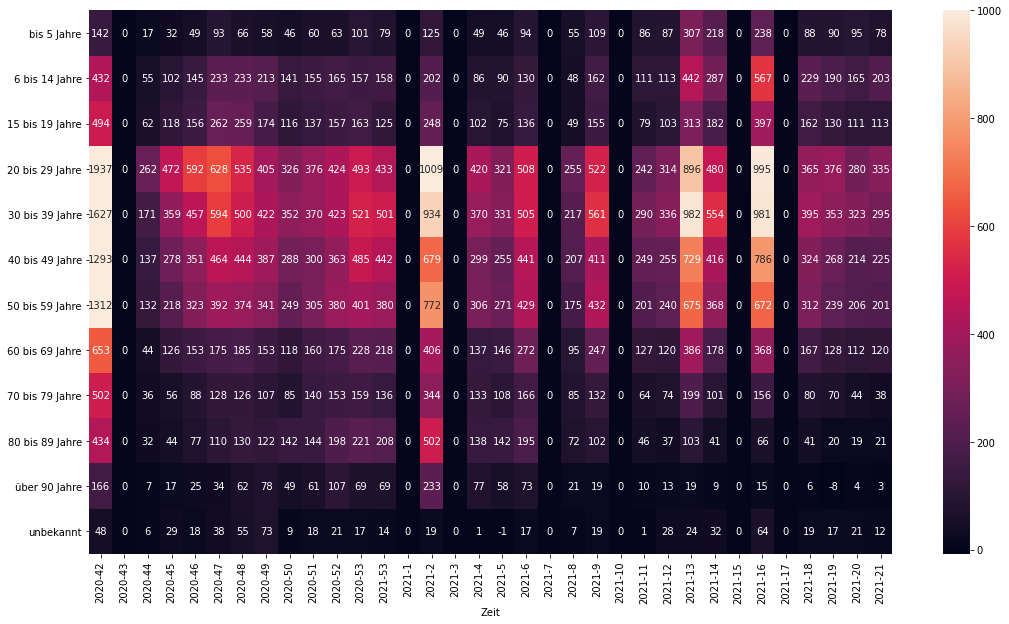

In [23]:
# Increase plot size
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(18, 10))

# Plot graph
import seaborn as sns;
sns.heatmap(df, vmax=1000, annot=True, fmt="d")